In [2]:
!pip install geopandas

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached shapely-2.0.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.3 MB)
  Using cached Fiona-1.9.0-cp37-cp37m-manylinux2014_x86_64.whl (17.0 MB)
  Using cached pyproj-3.2.1-cp37-cp37m-manylinux2010_x86_64.whl (6.3 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: click
    Found existing installation: Click 7.0
    Uninstalling Click-7.0:
      Successfully uninstalled Click-7.0


In [3]:
import pandas as pd
import geopandas as gpd
from shapely.wkt import loads
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import math

# Vale do Ribeira Region

In [4]:
df_BR = pd.read_csv('brasil-census-tracts.csv')
df_BR

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,WKT,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,...,ID1,layer,path,RENDA,LONG,LITERACY,IDHM_BRAZI,IDHM_BRA_1,IDHM_BRA_2,IDHM_BRA_3
0,MULTIPOLYGON (((-60.8957500655381 -11.35508255...,17182,110009812000003,RURAL,NaN,NaN,11000981200,NaN,110009812,NOVO PARA�SO,...,NaN,11SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.586,0.800,0.876,463.0,0.800000,0.876266,0.586029
1,MULTIPOLYGON (((-60.7499935772151 -11.39989561...,17183,110009815000001,URBANO,NaN,NaN,11000981500,NaN,110009815,FLOR DA SERRA,...,NaN,11SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.417,0.817,0.857,464.0,0.816667,0.857143,0.416726
2,MULTIPOLYGON (((-60.7298609571081 -11.35738091...,17184,110009815000002,RURAL,NaN,NaN,11000981500,NaN,110009815,FLOR DA SERRA,...,NaN,11SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.462,0.800,0.945,465.0,0.800000,0.945082,0.461572
3,MULTIPOLYGON (((-60.9182894903046 -11.29374439...,17185,110009815000003,RURAL,NaN,NaN,11000981500,NaN,110009815,FLOR DA SERRA,...,NaN,11SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.544,0.683,0.907,466.0,0.683333,0.907097,0.544350
4,MULTIPOLYGON (((-60.6904707619017 -11.38391361...,17186,110009815000004,RURAL,NaN,NaN,11000981500,NaN,110009815,FLOR DA SERRA,...,NaN,11SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.556,0.800,0.876,467.0,0.800000,0.876410,0.556010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316569,MULTIPOLYGON (((-47.8116481500064 -15.86004529...,4450,530010805300153,URBANO,NaN,NaN,53001080530,S�O SEBASTI�O,530010805,BRAS�LIA,...,NaN,53SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.855,0.783,0.997,4301.0,0.783333,0.997175,0.855060
316570,MULTIPOLYGON (((-47.8195053438414 -15.86180054...,4451,530010805300154,URBANO,NaN,NaN,53001080530,S�O SEBASTI�O,530010805,BRAS�LIA,...,NaN,53SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.969,0.783,1.000,4302.0,0.783333,1.000000,0.968965
316571,MULTIPOLYGON (((-47.817582705394 -15.855563747...,4452,530010805300155,URBANO,NaN,NaN,53001080530,S�O SEBASTI�O,530010805,BRAS�LIA,...,NaN,53SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.892,0.733,1.000,4303.0,0.733333,1.000000,0.892159
316572,MULTIPOLYGON (((-47.7840995782322 -15.90136684...,4453,530010805300156,URBANO,NaN,NaN,53001080530,S�O SEBASTI�O,530010805,BRAS�LIA,...,NaN,53SEE250GC_SIR,/Users/dant/Documents/1-Projetos/7-PARSEC/SETO...,0.511,0.500,0.938,4304.0,0.500000,0.937711,0.511095


In [5]:
df_VR = pd.read_csv('VR_clusters.csv', delimiter=';')
df_VR

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0
...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0


In [6]:
df_VR = pd.merge(df_VR, df_BR[['CD_GEOCODI','WKT']], left_on="Cod_setor", right_on="CD_GEOCODI", how="left")
df_VR

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,WKT
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"MULTIPOLYGON (((-48.847133 -24.514689,-48.8475..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"MULTIPOLYGON (((-48.845799 -24.51313,-48.84650..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"MULTIPOLYGON (((-48.844894 -24.517396,-48.8450..."
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0,350270505000004,MULTIPOLYGON (((-48.850383946118 -24.523331868...
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"MULTIPOLYGON (((-48.842276 -24.524945,-48.8424..."
...,...,...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0,412863305000009,MULTIPOLYGON (((-49.3991561913828 -24.70717591...
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0,412863305000010,MULTIPOLYGON (((-49.3707349642149 -24.61245860...
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0,412863305000011,MULTIPOLYGON (((-49.460651159277 -24.623451408...
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0,412863305000012,MULTIPOLYGON (((-49.5334780486908 -24.68126198...


In [7]:
df_VR['geometry'] = df_VR.WKT.apply(loads)
df_VR.drop('WKT', axis=1, inplace=True) #Drop WKT column

# Geopandas GeoDataFrame
gdf_VR = gpd.GeoDataFrame(df_VR, geometry='geometry')
gdf_VR

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"MULTIPOLYGON (((-48.84713 -24.51469, -48.84753..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"MULTIPOLYGON (((-48.84580 -24.51313, -48.84650..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"MULTIPOLYGON (((-48.84489 -24.51740, -48.84509..."
3,3,350270505000004,-48.846954,-24.519240,URBANO,0.808376,0.800000,0.939745,358.0,350270505000004,"MULTIPOLYGON (((-48.85038 -24.52333, -48.85048..."
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"MULTIPOLYGON (((-48.84228 -24.52494, -48.84244..."
...,...,...,...,...,...,...,...,...,...,...,...
875,875,412863305000009,-49.350120,-24.719030,RURAL,0.400798,0.750000,0.902424,546.0,412863305000009,"MULTIPOLYGON (((-49.39916 -24.70718, -49.35284..."
876,876,412863305000010,-49.384792,-24.660716,RURAL,0.449906,0.783333,0.900085,570.0,412863305000010,"MULTIPOLYGON (((-49.37073 -24.61246, -49.36844..."
877,877,412863305000011,-49.441333,-24.676312,RURAL,0.461763,0.783333,0.936782,341.0,412863305000011,"MULTIPOLYGON (((-49.46065 -24.62345, -49.46026..."
878,878,412863305000012,-49.493091,-24.678702,RURAL,0.428022,0.750000,0.885842,451.0,412863305000012,"MULTIPOLYGON (((-49.53348 -24.68126, -49.53345..."


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


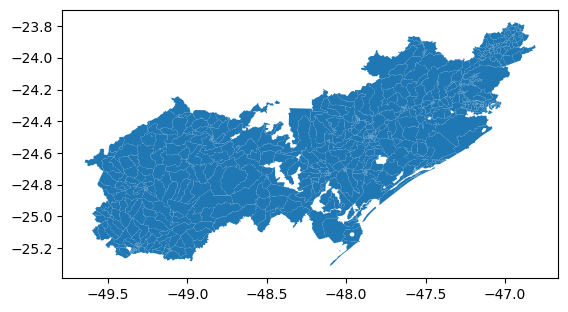

In [8]:
gdf_VR.plot()
plt.show()

In [9]:
df_VR['Cod_setor'].nunique()

880

# Static Maps Analysis

In [10]:
df_geo_sm = pd.read_csv('geo_sm.csv')
df_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,-24.70493405897603_-49.22055342451572_-24.6253...,DOUTOR ULYSSES,-24.704934,-49.220553,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.220553424515714 -24.70493405897603),412863305000006,872.0,-49.267460,-24.712696,RURAL,0.407464,0.750000,0.933594,381.0
31147,-24.782637892796757_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.782638,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.78263789279676),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0
31148,-24.774867509414683_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.774868,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.774867509414683),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0
31149,-24.76709712603261_-49.21201519318726_-24.6253...,DOUTOR ULYSSES,-24.767097,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.76709712603261),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0


In [11]:
df_geo_sm['setor'].nunique()

732

In [12]:
df_outer = df_VR[(~df_VR['Cod_setor'].isin(df_geo_sm['setor'].unique()))]
df_outer

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,"MULTIPOLYGON (((-48.84713 -24.51469, -48.84753..."
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,"MULTIPOLYGON (((-48.84580 -24.51313, -48.84650..."
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,"MULTIPOLYGON (((-48.84489 -24.51740, -48.84509..."
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,"MULTIPOLYGON (((-48.84228 -24.52494, -48.84244..."
6,6,350270505000007,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,350270505000007,"MULTIPOLYGON (((-48.85101 -24.51600, -48.85205..."
...,...,...,...,...,...,...,...,...,...,...,...
850,850,412220605000054,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,412220605000054,"MULTIPOLYGON (((-49.30285 -25.21688, -49.30295..."
851,851,412220610000001,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,412220610000001,"MULTIPOLYGON (((-49.48908 -24.98643, -49.48724..."
855,855,412788205000001,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,412788205000001,"MULTIPOLYGON (((-49.08840 -24.97562, -49.08834..."
860,860,412788205000006,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,412788205000006,"MULTIPOLYGON (((-48.93254 -24.97791, -48.93154..."


In [13]:
gdf_Outer = gpd.GeoDataFrame(
    df_outer, geometry=gpd.points_from_xy(df_outer.lat, df_outer.long))
gdf_Outer

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,POINT (-48.84898 -24.51306)
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,POINT (-48.84697 -24.51158)
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,POINT (-48.84509 -24.51476)
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,POINT (-48.84191 -24.52287)
6,6,350270505000007,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,350270505000007,POINT (-48.84954 -24.51505)
...,...,...,...,...,...,...,...,...,...,...,...
850,850,412220605000054,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,412220605000054,POINT (-49.30273 -25.21582)
851,851,412220610000001,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,412220610000001,POINT (-49.48214 -24.98954)
855,855,412788205000001,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,412788205000001,POINT (-49.08727 -24.97220)
860,860,412788205000006,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,412788205000006,POINT (-48.92863 -24.97913)


/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


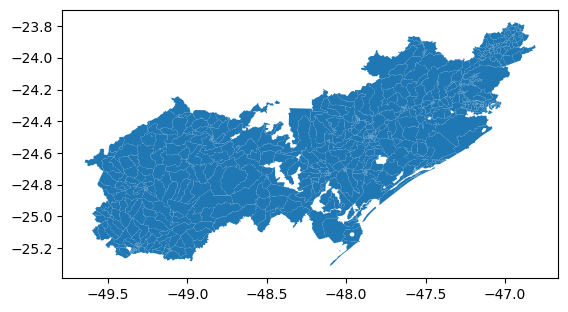

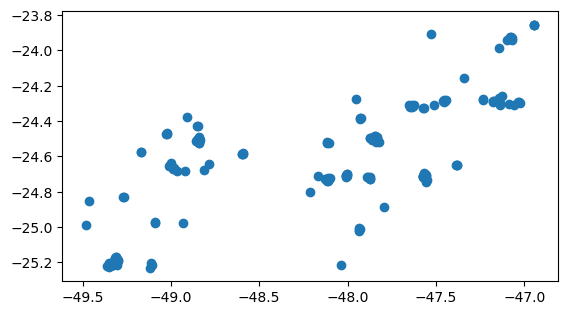

In [14]:
gdf_VR.plot()
gdf_Outer.plot()
plt.show()

In [15]:
def calculate_map_area(zoom_level, latitude, longitude, width, height):
    earth_circumference = 40075016.686 # Circumference of the Earth at the equator in meters
    latitude = math.radians(latitude)
    width_in_meters = earth_circumference * math.cos(latitude) / 2**(zoom_level + 8) * width
    height_in_meters = earth_circumference / 2**(zoom_level + 8) * height
    return 0.89 #width_in_meters * height_in_meters

In [16]:
def generate_polygon(center_lat, center_lon, area):
    side_length = (area/1000000)**0.5
    half_side = side_length/2
    lat_diff = (110.574 * half_side)
    lon_diff = (111.320 * half_side) / math.cos(center_lat)

    return [
        (center_lon - lon_diff, center_lat - lat_diff),
        (center_lon + lon_diff, center_lat - lat_diff),
        (center_lon + lon_diff, center_lat + lat_diff),
        (center_lon - lon_diff, center_lat + lat_diff)
    ]

def create_polygon_by_center(row):
    return Polygon(generate_polygon(row['image_lat'],row['image_lon'],calculate_map_area(16,row['image_lat'],row['image_lon'], 200, 200)))

In [17]:
def find_next(value, column):
    next = df_geo_sm[df_geo_sm[column] > value][column].min()
    return next

def create_polygon_by_name_find(row):
    lat_min = row['image_lat']
    lat_max = find_next(lat_min, 'image_lat')
    lon_min = row['image_lon']
    lon_max = find_next(lon_min, 'image_lon')
    
    return Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)])

In [18]:
def create_polygon_by_name(row):
    lat1, lon1, lat2, lon2 = row['image_name'].split("_")[:4]
    lon2, _ = lon2.split(".png")
    
    lat = [lat1, lat2]
    lat.sort()
    lat_min, lat_max = lat
    
    lon = [lon1, lon2]
    lon.sort()
    lon_min, lon_max = lon
    
    return Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)])


In [19]:
def create_polygon(row):
    lat = [row['image_lat'], row['cluster_lat']]
    lat.sort()
    lat_min, lat_max = lat
    
    lon = [row['image_lon'], row['cluster_lon']]
    lon.sort()
    lon_min, lon_max = lon
    
    return Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)])


In [20]:
df_geo_sm['polygon'] = df_geo_sm.apply(create_polygon_by_center, axis=1)

In [21]:
gdf_geo_sm = gpd.GeoDataFrame(
    df_geo_sm, geometry='polygon')
gdf_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population,polygon
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.18707 -24.38090, -49.03571 -24.3..."
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17856 -24.38090, -49.02720 -24.3..."
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17918 -24.37311, -49.02658 -24.3..."
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.16944 -24.38870, -49.01929 -24.3..."
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17004 -24.38090, -49.01868 -24.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,-24.70493405897603_-49.22055342451572_-24.6253...,DOUTOR ULYSSES,-24.704934,-49.220553,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.220553424515714 -24.70493405897603),412863305000006,872.0,-49.267460,-24.712696,RURAL,0.407464,0.750000,0.933594,381.0,"POLYGON ((-49.27826 -24.75709, -49.16284 -24.7..."
31147,-24.782637892796757_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.782638,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.78263789279676),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.26792 -24.83480, -49.15611 -24.8..."
31148,-24.774867509414683_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.774868,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.774867509414683),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.26808 -24.82703, -49.15595 -24.8..."
31149,-24.76709712603261_-49.21201519318726_-24.6253...,DOUTOR ULYSSES,-24.767097,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.76709712603261),412863305000007,873.0,-49.240663,-24.764145,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.26824 -24.81925, -49.15579 -24.8..."


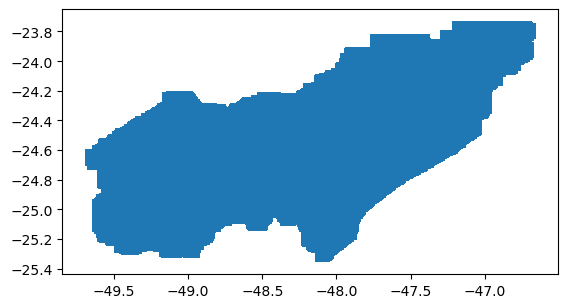

In [22]:
gdf_geo_sm.plot()
plt.show()

In [23]:
df_plot = gdf_geo_sm[gdf_geo_sm['polygon'].isnull()==False]

In [24]:
df_plot['geometry']=df_plot['polygon']

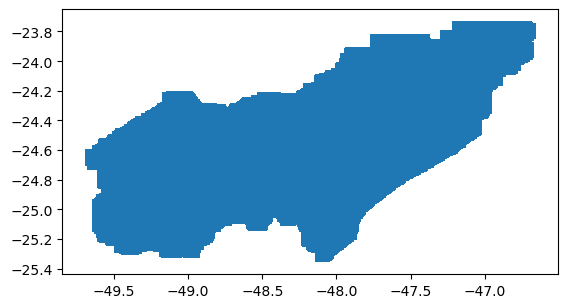

In [25]:
df_plot.plot()
plt.show()

In [26]:
gdf_Outer["new_setor"] = None
gdf_Outer["new_image_name"] = None
for i, row in gdf_Outer.iterrows():
    point = row["geometry"]
    for j, polygon in gdf_geo_sm.iterrows():
        if point.within(polygon["polygon"]):
            gdf_Outer.at[i, "new_setor"] = polygon["setor"]
            gdf_Outer.at[i, "new_image_name"] = polygon["image_name"]
gdf_Outer

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry,new_setor,new_image_name
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,POINT (-48.84898 -24.51306),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,POINT (-48.84697 -24.51158),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,POINT (-48.84509 -24.51476),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,POINT (-48.84191 -24.52287),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
6,6,350270505000007,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,350270505000007,POINT (-48.84954 -24.51505),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,850,412220605000054,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,412220605000054,POINT (-49.30273 -25.21582),412220605000043,-25.164920545932787_-49.25828998699654_-25.076...
851,851,412220610000001,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,412220610000001,POINT (-49.48214 -24.98954),412220605000030,-24.938795474385977_-49.4361182147098_-25.0764...
855,855,412788205000001,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,412788205000001,POINT (-49.08727 -24.97220),412788205000003,-24.927570273893366_-49.04093107194388_-24.952...
860,860,412788205000006,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,412788205000006,POINT (-48.92863 -24.97913),412788205000009,-24.927570273893366_-48.87958960745497_-24.952...


In [27]:
gdf_Outer[gdf_Outer['new_image_name'].isnull()]

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry,new_setor,new_image_name


In [28]:
j = 0
for i, row in gdf_Outer.iterrows():
    if row["new_setor"]==None:
        j = j+1
        point = row["geometry"]
        polygon_index = gdf_geo_sm.distance(point).sort_values().index[0]
        if polygon_index:
            gdf_Outer.at[i, "new_setor"] = gdf_geo_sm["setor"].loc[polygon_index]
            gdf_Outer.at[i, "new_image_name"] = gdf_geo_sm["image_name"].loc[polygon_index]
print(j)


0


In [29]:
gdf_Outer[gdf_Outer['new_image_name'].isnull()]

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry,new_setor,new_image_name


In [30]:
gdf_Outer[gdf_Outer['new_image_name'].isnull()==False]

,Unnamed: 0,Cod_setor,lat,long,TIPO,income,longevity,literacy,population,CD_GEOCODI,geometry,new_setor,new_image_name
0,0,350270505000001,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,350270505000001,POINT (-48.84898 -24.51306),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
1,1,350270505000002,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,350270505000002,POINT (-48.84697 -24.51158),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
2,2,350270505000003,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,350270505000003,POINT (-48.84509 -24.51476),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
4,4,350270505000005,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,350270505000005,POINT (-48.84191 -24.52287),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
6,6,350270505000007,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,350270505000007,POINT (-48.84954 -24.51505),352215805000009,-24.559680935819074_-48.7895806408923_-24.6178...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,850,412220605000054,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,412220605000054,POINT (-49.30273 -25.21582),412220605000043,-25.164920545932787_-49.25828998699654_-25.076...
851,851,412220610000001,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,412220610000001,POINT (-49.48214 -24.98954),412220605000030,-24.938795474385977_-49.4361182147098_-25.0764...
855,855,412788205000001,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,412788205000001,POINT (-49.08727 -24.97220),412788205000003,-24.927570273893366_-49.04093107194388_-24.952...
860,860,412788205000006,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,412788205000006,POINT (-48.92863 -24.97913),412788205000009,-24.927570273893366_-48.87958960745497_-24.952...


In [31]:

df_new = pd.DataFrame(columns = list(df_geo_sm))
for i, row in gdf_Outer.iterrows():    
    value = row["new_image_name"]
    new_row = df_geo_sm.query("image_name==@value")   
    obj = {
        'image_name':row["new_image_name"],
        'NM_MUNICIP':new_row.at[new_row.index[0],'NM_MUNICIP'],
        'image_lat':new_row.at[new_row.index[0],'image_lat'],
        'image_lon':new_row.at[new_row.index[0],'image_lon'],
        'cluster_lat':new_row.at[new_row.index[0],'cluster_lat'],
        'cluster_lon':new_row.at[new_row.index[0],'cluster_lon'],
        'features':new_row.at[new_row.index[0],'features'],
        'area':new_row.at[new_row.index[0],'area'],
        'geometry':new_row.at[new_row.index[0],'geometry'],
        'setor':row["Cod_setor"],
        'Unnamed: 0':row["Unnamed: 0"],
        'lat':row["lat"],
        'long':row["long"],
        'TIPO':row["TIPO"],
        'income':row["income"],
        'longevity':row["longevity"],
        'literacy':row["literacy"],
        'population':row["population"],
         'polygon':None,
    }

    df_new = df_new.append(obj, ignore_index=True)


In [32]:
df_new

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population,polygon
0,-24.559680935819074_-48.7895806408923_-24.6178...,ITAÓCA,-24.559681,-48.789581,-24.617881,-48.839005,"{'type': 'center_point', 'coordinates': [-24.5...",MULTIPOLYGON(((-48.9239129393418 -24.587583314...,POINT (-48.7895806408923 -24.559680935819074),350270505000001,0,-48.848982,-24.513062,URBANO,0.606203,0.800000,0.970194,521.0,None
1,-24.559680935819074_-48.7895806408923_-24.6178...,ITAÓCA,-24.559681,-48.789581,-24.617881,-48.839005,"{'type': 'center_point', 'coordinates': [-24.5...",MULTIPOLYGON(((-48.9239129393418 -24.587583314...,POINT (-48.7895806408923 -24.559680935819074),350270505000002,1,-48.846967,-24.511579,URBANO,0.671455,0.850000,0.971920,452.0,None
2,-24.559680935819074_-48.7895806408923_-24.6178...,ITAÓCA,-24.559681,-48.789581,-24.617881,-48.839005,"{'type': 'center_point', 'coordinates': [-24.5...",MULTIPOLYGON(((-48.9239129393418 -24.587583314...,POINT (-48.7895806408923 -24.559680935819074),350270505000003,2,-48.845093,-24.514756,URBANO,0.778504,0.933333,0.975673,299.0,None
3,-24.559680935819074_-48.7895806408923_-24.6178...,ITAÓCA,-24.559681,-48.789581,-24.617881,-48.839005,"{'type': 'center_point', 'coordinates': [-24.5...",MULTIPOLYGON(((-48.9239129393418 -24.587583314...,POINT (-48.7895806408923 -24.559680935819074),350270505000005,4,-48.841910,-24.522869,URBANO,0.545806,0.816667,0.968134,837.0,None
4,-24.559680935819074_-48.7895806408923_-24.6178...,ITAÓCA,-24.559681,-48.789581,-24.617881,-48.839005,"{'type': 'center_point', 'coordinates': [-24.5...",MULTIPOLYGON(((-48.9239129393418 -24.587583314...,POINT (-48.7895806408923 -24.559680935819074),350270505000007,6,-48.849542,-24.515054,URBANO,0.609459,0.816667,0.970104,310.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-25.164920545932787_-49.25828998699654_-25.076...,RIO BRANCO DO SUL,-25.164921,-49.258290,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-25.1...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.25828998699654 -25.164920545932787),412220605000054,850,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,None
204,-24.938795474385977_-49.4361182147098_-25.0764...,RIO BRANCO DO SUL,-24.938795,-49.436118,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.43611821470979 -24.938795474385977),412220610000001,851,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,None
205,-24.927570273893366_-49.04093107194388_-24.952...,TUNAS DO PARANÁ,-24.927570,-49.040931,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-49.04093107194388 -24.92757027389337),412788205000001,855,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,None
206,-24.927570273893366_-48.87958960745497_-24.952...,TUNAS DO PARANÁ,-24.927570,-48.879590,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-48.87958960745497 -24.92757027389337),412788205000006,860,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,None


In [33]:
df_geo_sm = df_geo_sm.append(df_new)
df_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population,polygon
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.18707 -24.38090, -49.03571 -24.3..."
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17856 -24.38090, -49.02720 -24.3..."
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17918 -24.37311, -49.02658 -24.3..."
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.16944 -24.38870, -49.01929 -24.3..."
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.17004 -24.38090, -49.01868 -24.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-25.164920545932787_-49.25828998699654_-25.076...,RIO BRANCO DO SUL,-25.164921,-49.258290,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-25.1...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.25828998699654 -25.164920545932787),412220605000054,850,-49.302733,-25.215822,RURAL,0.504002,0.650000,0.891662,523.0,None
204,-24.938795474385977_-49.4361182147098_-25.0764...,RIO BRANCO DO SUL,-24.938795,-49.436118,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.43611821470979 -24.938795474385977),412220610000001,851,-49.482139,-24.989537,URBANO,0.564022,0.683333,0.969136,71.0,None
205,-24.927570273893366_-49.04093107194388_-24.952...,TUNAS DO PARANÁ,-24.927570,-49.040931,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-49.04093107194388 -24.92757027389337),412788205000001,855,-49.087273,-24.972205,URBANO,0.573401,0.733333,0.855208,1082.0,None
206,-24.927570273893366_-48.87958960745497_-24.952...,TUNAS DO PARANÁ,-24.927570,-48.879590,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-48.87958960745497 -24.92757027389337),412788205000006,860,-48.928630,-24.979127,RURAL,0.513213,0.783333,0.541950,553.0,None


In [34]:
df_geo_sm['setor'].nunique()

940

In [35]:
df_geo_sm['image_name'].nunique()

31151

In [35]:
#OUT_FILE   = 'df_geo_sm_All_census_tracts.csv'

In [36]:
#df_geo_sm.to_csv(OUT_FILE, mode='a', index=None)

In [36]:
cols =['setor','filename'] + ["v{:d}".format(x) for x in range(4096)]
df_sm_vector = pd.read_csv('vgg_features_sm.csv', #nrows = 1000,
                           header = None, names=cols)
df_sm_vector

,setor,filename,v0,v1,v2,v3,v4,v5,v6,v7,...,v4086,v4087,v4088,v4089,v4090,v4091,v4092,v4093,v4094,v4095
0,350270530000002,-24.328745942316303_-49.111388246241354_-24.42...,0.0,1.905618,0.000000,0.526517,2.065180,0.0,0.000000,0.0,...,1.117517,0.00000,0.000000,0.000000,0.058051,1.766315,0.000000,0.000000,0.000000,0.000000
1,350270530000002,-24.328745942316303_-49.102875278251105_-24.42...,0.0,0.649953,0.000000,1.290461,2.982911,0.0,0.000000,0.0,...,0.000000,0.00000,1.026406,0.000000,0.776519,0.587948,0.000000,0.000000,0.000000,0.000000
2,350270530000002,-24.320947354200456_-49.102875278251105_-24.42...,0.0,2.562950,0.000000,2.339698,1.017382,0.0,0.248386,0.0,...,1.283543,0.00000,0.171666,0.000000,0.000000,1.551953,0.000000,1.534409,0.000000,0.000000
3,350270530000002,-24.336544530432146_-49.09436231026086_-24.421...,0.0,0.513399,0.000000,1.697171,4.216822,0.0,0.948382,0.0,...,0.000000,0.00000,0.552224,0.000000,0.000000,1.310785,0.000000,1.368933,0.000000,0.000000
4,350270530000002,-24.328745942316303_-49.09436231026086_-24.421...,0.0,2.549427,0.000000,1.415525,1.230843,0.0,0.000000,0.0,...,1.635543,0.00000,0.743626,0.404047,0.000000,1.715948,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,412863305000006,-24.70493405897603_-49.22055342451572_-24.6253...,0.0,1.736383,0.000000,0.000000,1.181994,0.0,0.000000,0.0,...,0.849590,0.70081,0.000000,0.000000,0.899427,1.502242,1.140949,0.000000,0.066247,0.000000
31147,412863305000007,-24.782637892796757_-49.21201519318726_-24.625...,0.0,0.175580,0.000000,1.071594,2.312761,0.0,0.000000,0.0,...,0.036200,0.00000,1.647257,0.000000,0.000000,0.708313,0.000000,0.000000,0.724735,0.000000
31148,412863305000007,-24.774867509414683_-49.21201519318726_-24.625...,0.0,0.554035,0.000000,0.749430,4.211220,0.0,0.000000,0.0,...,0.000000,0.00000,1.316384,0.000000,0.000000,0.000000,0.450615,0.530357,0.000000,0.000000
31149,412863305000007,-24.76709712603261_-49.21201519318726_-24.6253...,0.0,2.017112,0.098035,1.048284,4.973418,0.0,0.249029,0.0,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.676192,1.012906,0.284038,0.302964


In [37]:
df_sm_vector['setor'].nunique()

732

In [38]:
df_new = pd.DataFrame(columns = list(df_sm_vector))
for i, row in gdf_Outer.iterrows():    
    value = row["new_image_name"]
    new_row = df_sm_vector.query("filename==@value")   
    new_row.at[new_row.index[0],'setor'] = row["Cod_setor"]

    df_new = df_new.append(new_row, ignore_index=True)

In [39]:
df_new

,setor,filename,v0,v1,v2,v3,v4,v5,v6,v7,...,v4086,v4087,v4088,v4089,v4090,v4091,v4092,v4093,v4094,v4095
0,350270505000001,-24.559680935819074_-48.7895806408923_-24.6178...,0.0,0.000000,0.000000,0.000000,1.928721,0.0,0.000000,0.0,...,0.618425,0.0,0.174175,0.0,0.261691,0.997851,0.020709,0.000000,0.000000,0.318523
1,350270505000002,-24.559680935819074_-48.7895806408923_-24.6178...,0.0,0.000000,0.000000,0.000000,1.928721,0.0,0.000000,0.0,...,0.618425,0.0,0.174175,0.0,0.261691,0.997851,0.020709,0.000000,0.000000,0.318523
2,350270505000003,-24.559680935819074_-48.7895806408923_-24.6178...,0.0,0.000000,0.000000,0.000000,1.928721,0.0,0.000000,0.0,...,0.618425,0.0,0.174175,0.0,0.261691,0.997851,0.020709,0.000000,0.000000,0.318523
3,350270505000005,-24.559680935819074_-48.7895806408923_-24.6178...,0.0,0.000000,0.000000,0.000000,1.928721,0.0,0.000000,0.0,...,0.618425,0.0,0.174175,0.0,0.261691,0.997851,0.020709,0.000000,0.000000,0.318523
4,350270505000007,-24.559680935819074_-48.7895806408923_-24.6178...,0.0,0.000000,0.000000,0.000000,1.928721,0.0,0.000000,0.0,...,0.618425,0.0,0.174175,0.0,0.261691,0.997851,0.020709,0.000000,0.000000,0.318523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,412220605000054,-25.164920545932787_-49.25828998699654_-25.076...,0.0,2.803880,0.000000,0.000000,3.418668,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,1.603904,0.000000,1.451806,0.000000,0.000000
204,412220610000001,-24.938795474385977_-49.4361182147098_-25.0764...,0.0,2.176898,0.000000,0.350617,3.743097,0.0,0.000000,0.0,...,0.756404,0.0,0.000000,0.0,1.628646,1.487904,0.000000,0.000000,0.147699,0.294601
205,412788205000001,-24.927570273893366_-49.04093107194388_-24.952...,0.0,2.658201,0.526692,0.979084,2.719251,0.0,1.954861,0.0,...,0.000390,0.0,1.252307,0.0,0.387992,0.151178,0.000000,0.000000,0.000000,0.000000
206,412788205000006,-24.927570273893366_-48.87958960745497_-24.952...,0.0,0.830032,0.000000,2.016321,0.172429,0.0,4.072316,0.0,...,1.301170,0.0,1.838928,0.0,0.000000,2.677258,0.000000,0.114256,0.428509,0.000000


In [40]:
df_sm_vector = df_sm_vector.append(df_new)
df_sm_vector

,setor,filename,v0,v1,v2,v3,v4,v5,v6,v7,...,v4086,v4087,v4088,v4089,v4090,v4091,v4092,v4093,v4094,v4095
0,350270530000002,-24.328745942316303_-49.111388246241354_-24.42...,0.0,1.905618,0.000000,0.526517,2.065180,0.0,0.000000,0.0,...,1.117517,0.0,0.000000,0.000000,0.058051,1.766315,0.0,0.000000,0.000000,0.000000
1,350270530000002,-24.328745942316303_-49.102875278251105_-24.42...,0.0,0.649953,0.000000,1.290461,2.982911,0.0,0.000000,0.0,...,0.000000,0.0,1.026406,0.000000,0.776519,0.587948,0.0,0.000000,0.000000,0.000000
2,350270530000002,-24.320947354200456_-49.102875278251105_-24.42...,0.0,2.562950,0.000000,2.339698,1.017382,0.0,0.248386,0.0,...,1.283543,0.0,0.171666,0.000000,0.000000,1.551953,0.0,1.534409,0.000000,0.000000
3,350270530000002,-24.336544530432146_-49.09436231026086_-24.421...,0.0,0.513399,0.000000,1.697171,4.216822,0.0,0.948382,0.0,...,0.000000,0.0,0.552224,0.000000,0.000000,1.310785,0.0,1.368933,0.000000,0.000000
4,350270530000002,-24.328745942316303_-49.09436231026086_-24.421...,0.0,2.549427,0.000000,1.415525,1.230843,0.0,0.000000,0.0,...,1.635543,0.0,0.743626,0.404047,0.000000,1.715948,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,412220605000054,-25.164920545932787_-49.25828998699654_-25.076...,0.0,2.803880,0.000000,0.000000,3.418668,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,1.603904,0.0,1.451806,0.000000,0.000000
204,412220610000001,-24.938795474385977_-49.4361182147098_-25.0764...,0.0,2.176898,0.000000,0.350617,3.743097,0.0,0.000000,0.0,...,0.756404,0.0,0.000000,0.000000,1.628646,1.487904,0.0,0.000000,0.147699,0.294601
205,412788205000001,-24.927570273893366_-49.04093107194388_-24.952...,0.0,2.658201,0.526692,0.979084,2.719251,0.0,1.954861,0.0,...,0.000390,0.0,1.252307,0.000000,0.387992,0.151178,0.0,0.000000,0.000000,0.000000
206,412788205000006,-24.927570273893366_-48.87958960745497_-24.952...,0.0,0.830032,0.000000,2.016321,0.172429,0.0,4.072316,0.0,...,1.301170,0.0,1.838928,0.000000,0.000000,2.677258,0.0,0.114256,0.428509,0.000000


In [41]:
df_sm_vector['setor'].nunique()

940

In [42]:
df_sm_vector['filename'].nunique()

31151

In [43]:
for value in list(df_geo_sm['image_name']):
  if (value not in list(df_sm_vector['filename'])):
      print(value)

In [44]:
for value in list(df_sm_vector['filename']):
  if (value not in list(df_geo_sm['image_name'])):
      print(value)

In [ ]:
#OUT_FILE   = 'df_sm_vector_All_census_tracts.csv'

In [ ]:
#df_sm_vector.to_csv(OUT_FILE, mode='a', index=None)

# Street-Level images analisys

In [45]:
df_geo_sv = pd.read_csv('geo_sv.csv')
df_geo_sv

,city,direction,filename,latitude,longitude,name,pano_id,uf,geometry,setor
0,APIAÍ,0,amYzj4DUMQbgHzB9M3a_WA-0.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14
1,APIAÍ,90,amYzj4DUMQbgHzB9M3a_WA-90.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14
2,APIAÍ,180,amYzj4DUMQbgHzB9M3a_WA-180.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14
3,APIAÍ,270,amYzj4DUMQbgHzB9M3a_WA-270.jpg,-24.514697,-48.846783,unknown,amYzj4DUMQbgHzB9M3a_WA,unknown,POINT (-48.8467829 -24.51469710000001),3.502705e+14
4,APIAÍ,0,LoaIOwDck-H26nB1MZdD7Q-0.jpg,-24.514405,-48.846691,unknown,LoaIOwDck-H26nB1MZdD7Q,unknown,POINT (-48.84669064403143 -24.51440519523027),3.502705e+14
...,...,...,...,...,...,...,...,...,...,...
112363,DOUTOR ULYSSES,270,oSXOgE7j3mV9lfiPJMwySA-270.jpg,-24.646414,-49.425382,unknown,oSXOgE7j3mV9lfiPJMwySA,unknown,POINT (-49.42538241476539 -24.64641441220216),4.128633e+14
112364,DOUTOR ULYSSES,0,VknK6sWJIKFoVDOPr94viA-0.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14
112365,DOUTOR ULYSSES,90,VknK6sWJIKFoVDOPr94viA-90.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14
112366,DOUTOR ULYSSES,180,VknK6sWJIKFoVDOPr94viA-180.jpg,-24.625669,-49.418806,unknown,VknK6sWJIKFoVDOPr94viA,unknown,POINT (-49.41880613831557 -24.62566856991785),4.128633e+14


In [46]:
df_geo_sv['setor'].nunique()

514

In [47]:
df_geo_sv['filename'].nunique()

112368

In [ ]:
df_sv_vector = pd.read_csv('vgg_features_sv.csv')#, nrows = 1000)
df_sv_vector

In [ ]:
df_sv_vector['setor'].nunique()

In [ ]:
df_sv_vector['filename'].nunique()

# Plots

In [48]:
geo = gpd.read_file('vale_ribeira.dbf')
geo

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,ORIG_OGC_F,geometry
0,66717.0,350270505000001,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1805,"POLYGON ((-48.84713 -24.51469, -48.84753 -24.5..."
1,66718.0,350270505000002,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1806,"POLYGON ((-48.84580 -24.51313, -48.84650 -24.5..."
2,66719.0,350270505000003,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1807,"POLYGON ((-48.84489 -24.51740, -48.84509 -24.5..."
3,66720.0,350270505000004,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1808,"POLYGON ((-48.85038 -24.52333, -48.85048 -24.5..."
4,66721.0,350270505000005,URBANO,35027050500,NaN,350270505,APIAÍ,3502705,APIAÍ,CAPÃO BONITO,ITAPETININGA,1809,"POLYGON ((-48.84228 -24.52494, -48.84244 -24.5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,21414.0,412863305000009,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17654,"POLYGON ((-49.39916 -24.70718, -49.35284 -24.6..."
950,21415.0,412863305000010,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17655,"POLYGON ((-49.37073 -24.61246, -49.36844 -24.6..."
951,21416.0,412863305000011,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17656,"POLYGON ((-49.46065 -24.62345, -49.46026 -24.6..."
952,21417.0,412863305000012,RURAL,41286330500,NaN,412863305,DOUTOR ULYSSES,4128633,DOUTOR ULYSSES,CERRO AZUL,METROPOLITANA DE CURITIBA,17657,"POLYGON ((-49.53348 -24.68126, -49.53345 -24.6..."


In [49]:
#df_geo_sm[df_geo_sm['income'] == 0]

In [50]:
#gdf_geo_sm = gpd.GeoDataFrame(
#    df_geo_sm, geometry='polygon')
#gdf_geo_sm

In [51]:
def create_point(row):
    return Point([(row['longitude'], row['latitude'])])


In [52]:
df_geo_sv = pd.read_csv('geo_sv.csv')
df_geo_sv['POINT'] = df_geo_sv.apply(create_point, axis=1)
gdf_geo_sv = gpd.GeoDataFrame(df_geo_sv, geometry = 'POINT')

In [53]:
gdf_geo_sm['polygon_area']=gdf_geo_sm['polygon'].area

/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
No handles with labels found to put in legend.
/opt/conda/lib/python3.7/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarnin

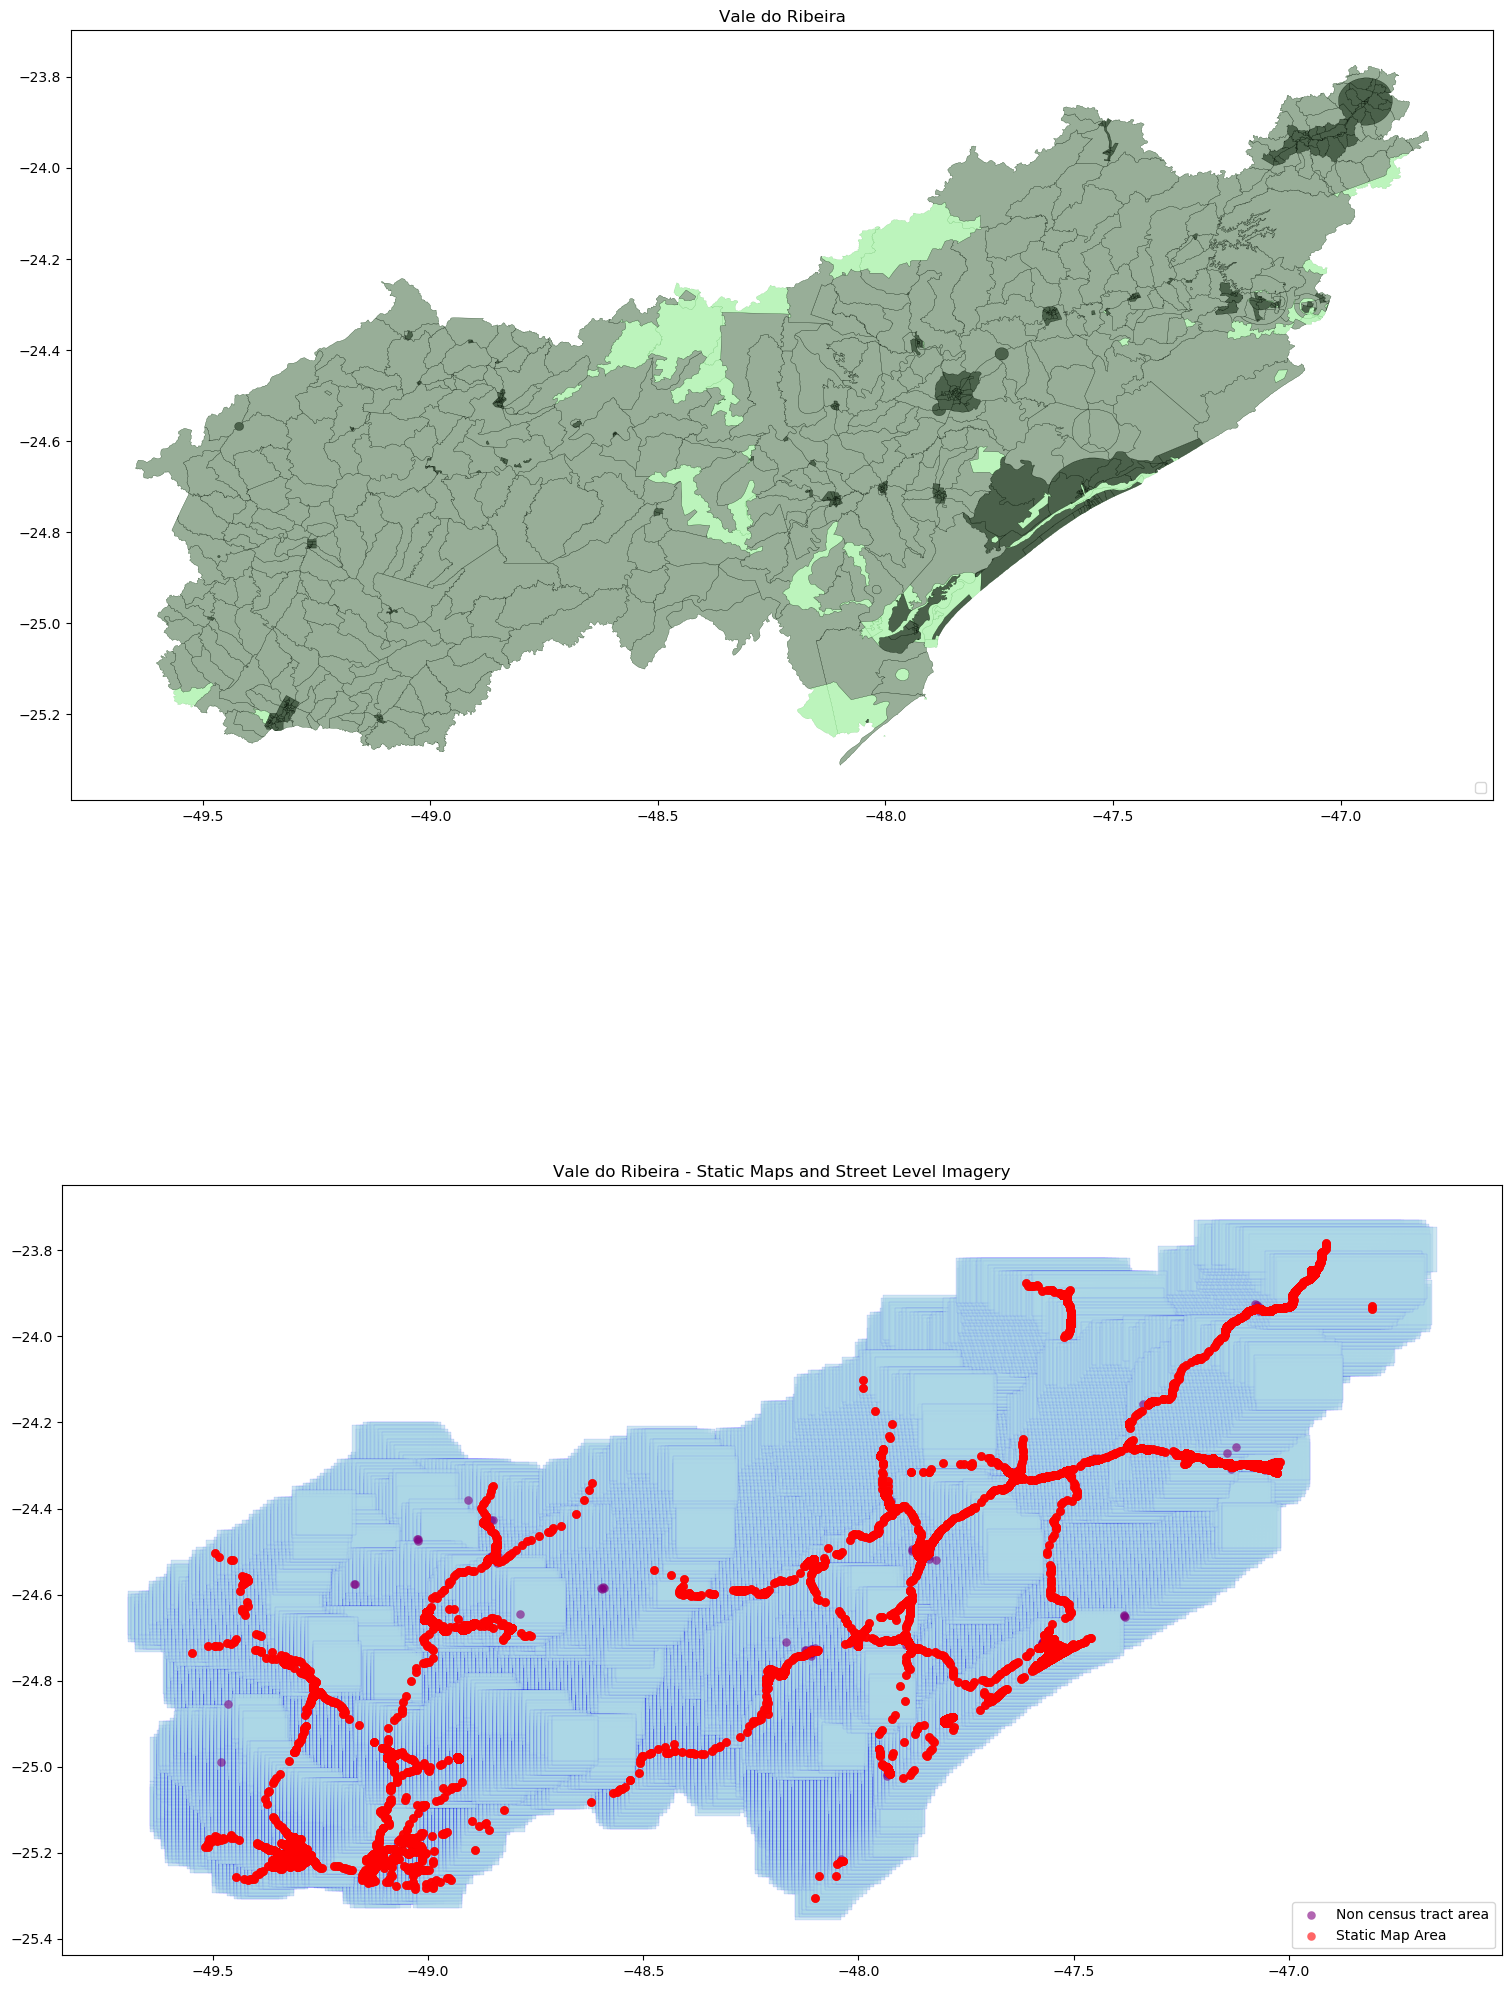

In [57]:
fig, axs = plt.subplots(2, 1, figsize=(20*5,5*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axs[0].set_title('Vale do Ribeira')    
geo.plot(color= 'lightgreen',alpha=0.6, edgecolor='green',ax=axs[0], linewidth=0.1, label='Non census tract area (protected)') #contourn
gdf_VR[gdf_VR['TIPO']=='URBANO'].plot(color= 'black',alpha=0.6, edgecolor='black',ax=axs[0], linewidth=0.2, label='Urban area') #contourn
gdf_VR[gdf_VR['TIPO']=='RURAL'].plot(color= 'gray',alpha=0.6, edgecolor='black',ax=axs[0], linewidth=0.2, label='Rural area') #contourn
axs[0].legend(loc='lower right')

axs[1].set_title('Vale do Ribeira - Static Maps and Street Level Imagery')    
geo.plot(color= 'lightgreen',alpha=0.6, edgecolor='green',ax=axs[1], linewidth=0.1,  label='Non census tract area', zorder=1) #contourn
#gdf_VR[gdf_VR['TIPO']=='URBANO'].plot(color= 'black',alpha=0.6, edgecolor='black',ax=axs[1], linewidth=0.2) #contourn
#gdf_VR[gdf_VR['TIPO']=='RURAL'].plot(color= 'gray',alpha=0.6, edgecolor='black',ax=axs[1], linewidth=0.2) #contourn
gdf_geo_sm[gdf_geo_sm['polygon_area']<1.005].plot(color= 'lightblue',alpha=0.6, edgecolor='blue',ax=axs[1], linewidth=0.1, label='Static Map Area', zorder=2) #contourn
gdf_Outer.plot(color= 'purple',alpha=0.6, edgecolor='purple',ax=axs[1], linewidth=0.1, label='Multiple Census Tract in a Static Map', zorder=3) #contourn
gdf_geo_sv.plot(color= 'red',alpha=0.6, edgecolor='red',ax=axs[1], linewidth=0.1, label='Street Level Image', zorder=4) #contourn
axs[1].legend(loc='lower right', labels = ['Non census tract area','Static Map Area','Multiple Census Tract in a Static Map', 'Street Level Image'  ])

plt.show()

In [ ]:
gdf_geo_sm

In [59]:
gdf_geo_sm.fillna(0, inplace=True)

ValueError: Cannot setitem on a Categorical with a new category, set the categories first

In [74]:
gdf_geo_sm['polygon_area_category']= pd.qcut(gdf_geo_sm['polygon_area'], q=5)

In [75]:
area_counts = gdf_geo_sm['polygon_area_category'].value_counts()
area_counts = area_counts.sort_index()
print(area_counts)

(0.009999999999999998, 0.0112]    6290
(0.0112, 0.0121]                  6255
(0.0121, 0.0135]                  6293
(0.0135, 0.0161]                  6274
(0.0161, 0.0501]                  6247
Name: polygon_area_category, dtype: int64


In [60]:
gdf_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,Unnamed: 0,lat,long,TIPO,income,longevity,literacy,population,polygon
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0,0,0,0,"POLYGON ((-49.11139 -24.42147, -48.81736 -24.4..."
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0,0,0,0,"POLYGON ((-49.10288 -24.42147, -48.81736 -24.4..."
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,51.0,-49.049589,-24.310839,RURAL,0,0,0,0,"POLYGON ((-49.10288 -24.42147, -48.81736 -24.4..."
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,51.0,-49.049589,-24.310839,RURAL,0,0,0,0,"POLYGON ((-49.09436 -24.42147, -48.81736 -24.4..."
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,51.0,-49.049589,-24.310839,RURAL,0,0,0,0,"POLYGON ((-49.09436 -24.42147, -48.81736 -24.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,-25.21950245975443_-49.22441794362258_-25.0764...,RIO BRANCO DO SUL,-25.219502,-49.224418,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-25.2...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.224417943622576 -25.21950245975443),412220605000054,850,-49.302733,-25.215822,RURAL,0,0,0,0,None
204,-24.923200641865506_-49.48692627977073_-25.076...,RIO BRANCO DO SUL,-24.923201,-49.486926,-25.076465,-49.347577,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-49.4292612039632 -24.904353409...,POINT (-49.48692627977073 -24.923200641865506),412220610000001,851,-49.482139,-24.989537,URBANO,0,0,0,0,None
205,-24.973825915306104_-49.09188100809827_-24.952...,TUNAS DO PARANÁ,-24.973826,-49.091881,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-49.09188100809828 -24.973825915306104),412788205000001,855,-49.087273,-24.972205,URBANO,0,0,0,0,None
206,-24.981535188874894_-48.93053954360936_-24.952...,TUNAS DO PARANÁ,-24.981535,-48.930540,-24.952550,-48.902622,"{'type': 'center_point', 'coordinates': [-24.9...",MULTIPOLYGON(((-48.9290799792449 -24.879412890...,POINT (-48.93053954360936 -24.98153518887489),412788205000006,860,-48.928630,-24.979127,RURAL,0,0,0,0,None


In [52]:
gdf_geo_sm['income_category'] = pd.qcut(gdf_geo_sm['income'], q=5)
gdf_geo_sm['population_category'] = pd.qcut(gdf_geo_sm['population'], q=5)
gdf_geo_sm['literacy_category'] = pd.qcut(gdf_geo_sm['literacy'], q=5)
gdf_geo_sm['longevity_category'] = pd.qcut(gdf_geo_sm['longevity'], q=5)

In [53]:
gdf_geo_sm

,image_name,NM_MUNICIP,image_lat,image_lon,cluster_lat,cluster_lon,features,area,geometry,setor,...,TIPO,income,longevity,literacy,population,polygon,income_category,population_category,literacy_category,longevity_category
0,-24.328745942316303_-49.111388246241354_-24.42...,APIAÍ,-24.328746,-49.111388,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.11138824624136 -24.328745942316303),350270530000002,...,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.11139 -24.42147, -48.81736 -24.4...","(0.209, 0.437]","(230.0, 364.0]","(0.954, 1.0]","(0.767, 0.8]"
1,-24.328745942316303_-49.102875278251105_-24.42...,APIAÍ,-24.328746,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.328745942316303),350270530000002,...,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.10288 -24.42147, -48.81736 -24.4...","(0.209, 0.437]","(230.0, 364.0]","(0.954, 1.0]","(0.767, 0.8]"
2,-24.320947354200456_-49.102875278251105_-24.42...,APIAÍ,-24.320947,-49.102875,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.10287527825111 -24.320947354200452),350270530000002,...,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.10288 -24.42147, -48.81736 -24.4...","(0.209, 0.437]","(230.0, 364.0]","(0.954, 1.0]","(0.767, 0.8]"
3,-24.336544530432146_-49.09436231026086_-24.421...,APIAÍ,-24.336545,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.336544530432143),350270530000002,...,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.09436 -24.42147, -48.81736 -24.4...","(0.209, 0.437]","(230.0, 364.0]","(0.954, 1.0]","(0.767, 0.8]"
4,-24.328745942316303_-49.09436231026086_-24.421...,APIAÍ,-24.328746,-49.094362,-24.421470,-48.817357,"{'type': 'center_point', 'coordinates': [-24.3...",MULTIPOLYGON(((-48.5833786383066 -24.337911414...,POINT (-49.094362310260856 -24.328745942316303),350270530000002,...,RURAL,0.436439,0.800000,0.964335,339.0,"POLYGON ((-49.09436 -24.42147, -48.81736 -24.4...","(0.209, 0.437]","(230.0, 364.0]","(0.954, 1.0]","(0.767, 0.8]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31146,-24.70493405897603_-49.22055342451572_-24.6253...,DOUTOR ULYSSES,-24.704934,-49.220553,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.220553424515714 -24.70493405897603),412863305000006,...,RURAL,0.407464,0.750000,0.933594,381.0,"POLYGON ((-49.39222 -24.70493, -49.22055 -24.7...","(0.209, 0.437]","(364.0, 546.0]","(0.927, 0.954]","(0.733, 0.767]"
31147,-24.782637892796757_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.782638,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.78263789279676),412863305000007,...,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.39222 -24.78264, -49.21202 -24.7...","(0.496, 0.529]","(143.0, 230.0]","(0.869, 0.906]","(0.299, 0.733]"
31148,-24.774867509414683_-49.21201519318726_-24.625...,DOUTOR ULYSSES,-24.774868,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49.212015193187256 -24.774867509414683),412863305000007,...,RURAL,0.502978,0.716667,0.896348,220.0,"POLYGON ((-49.39222 -24.77487, -49.21202 -24.7...","(0.496, 0.529]","(143.0, 230.0]","(0.869, 0.906]","(0.299, 0.733]"
31149,-24.76709712603261_-49.21201519318726_-24.6253...,DOUTOR ULYSSES,-24.767097,-49.212015,-24.625378,-49.392223,"{'type': 'center_point', 'coordinates': [-24.7...",MULTIPOLYGON(((-49.4038750791893 -24.498103035...,POINT (-49

In [54]:
income_counts = gdf_geo_sm['income_category'].value_counts()
income_counts = income_counts.sort_index()
print(income_counts)

(0.209, 0.437]    5844
(0.437, 0.466]    5798
(0.466, 0.496]    6064
(0.496, 0.529]    5535
(0.529, 0.808]    5790
Name: income_category, dtype: int64


In [55]:
population_counts = gdf_geo_sm['population_category'].value_counts()
population_counts = population_counts.sort_index()
print(population_counts)

(14.999, 143.0]    6241
(143.0, 230.0]     5435
(230.0, 364.0]     5767
(364.0, 546.0]     5826
(546.0, 1979.0]    5762
Name: population_category, dtype: int64


In [56]:
literacy_counts = gdf_geo_sm['literacy_category'].value_counts()
literacy_counts = literacy_counts.sort_index()
print(literacy_counts)

(0.416, 0.869]    5810
(0.869, 0.906]    6028
(0.906, 0.927]    5587
(0.927, 0.954]    5801
(0.954, 1.0]      5805
Name: literacy_category, dtype: int64


In [57]:
longevity_counts = gdf_geo_sm['longevity_category'].value_counts()
longevity_counts = longevity_counts.sort_index()
print(longevity_counts)

(0.299, 0.733]    6332
(0.733, 0.767]    5991
(0.767, 0.8]      5198
(0.8, 0.833]      5793
(0.833, 1.0]      5717
Name: longevity_category, dtype: int64


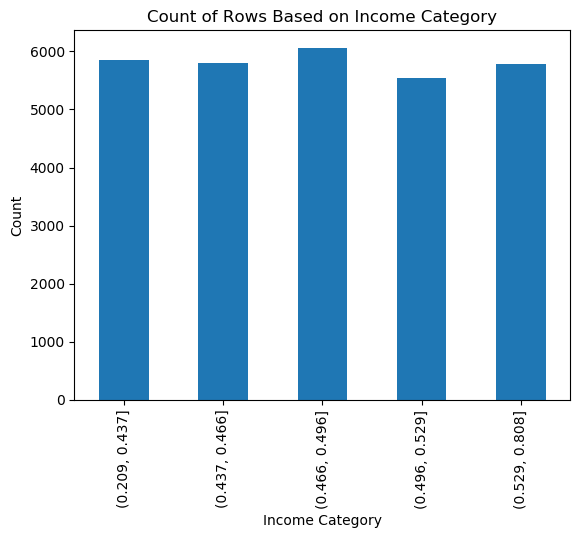

In [58]:
income_counts.plot(kind='bar')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Count of Rows Based on Income Category')
plt.show()

In [ ]:
gdf_geo_sm

In [ ]:
df_VR_Category = pd.merge(gdf_VR, gdf_geo_sm[['setor','image_name','income_category','population_category','longevity_category', 'literacy_category']], left_on="Cod_setor", right_on="setor", how='right')

In [ ]:
gdf_VR_Category = gpd.GeoDataFrame(df_VR_Category, geometry='geometry')
gdf_VR_Category

In [ ]:
fig, axs = plt.subplots(4, 1, figsize=(20*5,5*5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

cmap = plt.cm.get_cmap('YlOrRd', 5)    # 5 discrete colors

axs[0].set_title('Vale do Ribeira - Income Category')    
axs[0].legend(loc='lower right')
geo.plot(color= 'lightgreen',alpha=0.4, edgecolor='green',ax=axs[0], linewidth=0.1) #contourn
gdf_VR_Category.plot(column='income_category',alpha=0.6, cmap=cmap, ax=axs[0], linewidth=0.1, legend=True, legend_kwds={'loc': 'lower right'})


axs[1].set_title('Vale do Ribeira - Literacy Category')    
axs[1].legend(loc='lower right')
geo.plot(color= 'lightgreen',alpha=0.4, edgecolor='green',ax=axs[1], linewidth=0.1) #contourn
gdf_VR_Category.plot(column='literacy_category',alpha=0.6, cmap=cmap, ax=axs[1], linewidth=0.1, legend=True, legend_kwds={'loc': 'lower right'})


axs[2].set_title('Vale do Ribeira - Longevity Category')    
axs[2].legend(loc='lower right')
geo.plot(color= 'lightgreen',alpha=0.4, edgecolor='green',ax=axs[2], linewidth=0.1) #contourn
gdf_VR_Category.plot(column='longevity_category',alpha=0.6, cmap=cmap, ax=axs[2], linewidth=0.1, legend=True, legend_kwds={'loc': 'lower right'})


axs[3].set_title('Vale do Ribeira - Population Category')    
axs[3].legend(loc='lower right')
geo.plot(color= 'lightgreen',alpha=0.4, edgecolor='green',ax=axs[3], linewidth=0.1) #contourn
gdf_VR_Category.plot(column='population_category',alpha=0.6, cmap=cmap, ax=axs[3], linewidth=0.1, legend=True, legend_kwds={'loc': 'lower right'})



plt.show()


In [ ]:
gdf_VR_Category['Cod_setor'].nunique()

In [ ]:
df_geo_sm['setor'].nunique()

In [ ]:
df_geo_sm['image_name'].nunique()

In [ ]:
gdf_geo_sm['setor'].nunique()

In [69]:
df_combine = pd.read_csv('combine_All_census_tract.csv')
df_combine

,setor,filename_x,filename_y,direction,TIPO,income,literacy,population,longevity
0,350270530000002,-24.328745942316303_-49.111388246241354_-24.42...,0,0.0,RURAL,0.436439,0.964335,339.0,0.800000
1,350270530000002,-24.328745942316303_-49.102875278251105_-24.42...,0,0.0,RURAL,0.436439,0.964335,339.0,0.800000
2,350270530000002,-24.320947354200456_-49.102875278251105_-24.42...,0,0.0,RURAL,0.436439,0.964335,339.0,0.800000
3,350270530000002,-24.336544530432146_-49.09436231026086_-24.421...,0,0.0,RURAL,0.436439,0.964335,339.0,0.800000
4,350270530000002,-24.328745942316303_-49.09436231026086_-24.421...,0,0.0,RURAL,0.436439,0.964335,339.0,0.800000
...,...,...,...,...,...,...,...,...,...
806459,412788205000011,-24.981535188874894_-49.09188100809827_-24.952...,fJ1wRim2bFxkZF3S4o9q-A-270.jpg,270.0,URBANO,0.556493,0.853725,538.0,0.683333
806460,412788205000011,-24.981535188874894_-49.09188100809827_-24.952...,kYuGNyerVzd1Bn-qCLQv1Q-0.jpg,0.0,URBANO,0.556493,0.853725,538.0,0.683333
806461,412788205000011,-24.981535188874894_-49.09188100809827_-24.952...,kYuGNyerVzd1Bn-qCLQv1Q-90.jpg,90.0,URBANO,0.556493,0.853725,538.0,0.683333
806462,412788205000011,-24.981535188874894_-49.09188100809827_-24.952...,kYuGNyerVzd1Bn-qCLQv1Q-180.jpg,180.0,URBANO,0.556493,0.853725,538.0,0.683333


In [70]:
df_combine['setor'].nunique()

940

In [71]:
df_combine['category'] =  pd.qcut(df_combine['setor'].index, q=5, labels=False)

In [72]:
setor_group_counts = df_combine['category'].value_counts()
setor_group_counts = setor_group_counts.sort_index()
print(setor_group_counts)

0    161293
1    161293
2    161292
3    161293
4    161293
Name: category, dtype: int64


In [73]:
grouped = df_combine.groupby('category')
result = grouped['setor'].nunique()
print(result)

category
0    230
1     98
2    137
3    194
4    301
Name: setor, dtype: int64
